In [2]:
# Reading the dataset
import pandas as pd
df = pd.read_csv('wiki_movie_plots_deduped.csv')

In [3]:
df.shape

(34886, 8)

In [4]:
# How many unique values for the column 'Genre' do we have?
len(df['Genre'].unique())

2265

In [5]:
# Some of the genres in this column
df['Genre'].unique()

array(['unknown', 'western', 'comedy', ...,
       'adventure, romance, fantasy film', 'ero',
       'horror romantic comedy'], dtype=object)

In [7]:
# Start by deleting every row where the genre is unknown. 

df.drop(df[df['Genre'] == 'unknown'].index, inplace=True)


In [8]:
# We've deleted some rows in our dataset.
df.shape

(28803, 8)

We want to group similar categories since we have over 2000 unique values. Let's check how many do we have for some genres, then group those that are similar.

In [9]:
(df['Genre']=='action').value_counts()

Genre
False    27705
True      1098
Name: count, dtype: int64

In [10]:
(df['Genre']=='adventure').value_counts()

Genre
False    28277
True       526
Name: count, dtype: int64

In [11]:
# Change all of these specific genres to a broader one: action.

df['Genre'] = df['Genre'].replace('action comedy', 'action')
df['Genre'] = df['Genre'].replace('action drama', 'action')
df['Genre'] = df['Genre'].replace('action thriller', 'action')
df['Genre'] = df['Genre'].replace('action romance', 'action')
df['Genre'] = df['Genre'].replace('drama action', 'action')
df['Genre'] = df['Genre'].replace('action adventure', 'action')
df['Genre'] = df['Genre'].replace('crime thriller', 'action')
df['Genre'] = df['Genre'].replace('war drama', 'action')
df['Genre'] = df['Genre'].replace('war', 'action')
df['Genre'] = df['Genre'].replace('martial arts', 'action')
df['Genre'] = df['Genre'].replace('crime', 'action')

In [12]:
# Group in a new category: action/adventure

genre_mapping = { 
                 'action': 'action/adventure',
                 'adventure': 'action/adventure'
}

df['Genre'].replace(genre_mapping, inplace=True)

In [13]:
(df['Genre']=='action/adventure').value_counts()

Genre
False    25987
True      2816
Name: count, dtype: int64

In [14]:
(df['Genre']=='comedy').value_counts()

Genre
False    24424
True      4379
Name: count, dtype: int64

In [15]:
(df['Genre']=='rom com').value_counts()

Genre
False    28789
True        14
Name: count, dtype: int64

In [16]:
(df['Genre']=='romantic comedy').value_counts()

Genre
False    28342
True       461
Name: count, dtype: int64

In [17]:
(df['Genre']=='comedy romance').value_counts()

Genre
False    28797
True         6
Name: count, dtype: int64

In [18]:
(df['Genre']=='romance comedy').value_counts()

Genre
False    28801
True         2
Name: count, dtype: int64

In [19]:
# Change all  variants of 'rom com' to romantic comedy.

df['Genre'] = df['Genre'].replace('rom com', 'romantic comedy')
df['Genre'] = df['Genre'].replace('comedy romance', 'romantic comedy')
df['Genre'] = df['Genre'].replace('romance comedy', 'romantic comedy')

In [20]:
(df['Genre']=='romantic comedy').value_counts()

Genre
False    28320
True       483
Name: count, dtype: int64

In [21]:
(df['Genre']=='romance').value_counts()

Genre
False    27880
True       923
Name: count, dtype: int64

In [22]:
(df['Genre']=='drama romance').value_counts()

Genre
False    28800
True         3
Name: count, dtype: int64

In [23]:
df['Genre'] = df['Genre'].replace('drama romance', 'romance drama')

In [24]:
(df['Genre']=='romance drama').value_counts()

Genre
False    28772
True        31
Name: count, dtype: int64

In [35]:
(df['Genre']=='romantic').value_counts()

Genre
False    28796
True         7
Name: count, dtype: int64

In [36]:
# Group all romance genres into an only one.

genre_mapping2 = { 
                 'romantic comedy': 'romance',
                 'romance drama': 'romance',
                 'romantic': 'romance'
}

df['Genre'].replace(genre_mapping2, inplace=True)

In [37]:
(df['Genre']=='romance').value_counts()

Genre
False    27359
True      1444
Name: count, dtype: int64

In [27]:
(df['Genre']=='drama').value_counts()

Genre
False    22839
True      5964
Name: count, dtype: int64

In [28]:
(df['Genre']=='horror').value_counts()

Genre
False    27636
True      1167
Name: count, dtype: int64

In [29]:
df['Genre'] = df['Genre'].replace('horror comedy', 'horror')
(df['Genre']=='horror').value_counts()

Genre
False    27589
True      1214
Name: count, dtype: int64

In [31]:
# Include film noir into the thriller genre.

df['Genre'] = df['Genre'].replace('film noir', 'thriller')

In [32]:
# Group into a new category: suspense/thriller/mystery

genre_mapping3 = { 
                 'thriller': 'suspense/thriller/mystery',
                 'suspense': 'suspense/thriller/mystery',
                 'mystery': 'suspense/thriller/mystery'
}

df['Genre'].replace(genre_mapping3, inplace=True)

In [33]:
(df['Genre']=='suspense/thriller/mystery').value_counts()

Genre
False    27078
True      1725
Name: count, dtype: int64

Now let's create a new dataset than includes these top categories which we've previously selected.

In [56]:
# Our top 6 categories:
selected_genres = ['action/adventure', 'drama', 'comedy', 
                  'horror', 'suspense/thriller/mystery', 'romance']


# Check if the value in the 'Genre' column of the row is in the selected_genres list
def filter_by_genre(row):
    return row['Genre'] in selected_genres

# Apply the function to filter rows based on the 'Genre' column
filtered_df = df[df.apply(filter_by_genre, axis=1)]

# View the new dataset
filtered_df


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
14,1907,How Brown Saw the Baseball Game,American,Unknown,Unknown,comedy,https://en.wikipedia.org/wiki/How_Brown_Saw_th...,Before heading out to a baseball game at a nea...
15,1907,Laughing Gas,American,Edwin Stanton Porter,"Bertha Regustus, Edward Boulden",comedy,https://en.wikipedia.org/wiki/Laughing_Gas_(fi...,The plot is that of a black woman going to the...
16,1908,The Adventures of Dollie,American,D. W. Griffith,"Arthur V. Johnson, Linda Arvidson",drama,https://en.wikipedia.org/wiki/The_Adventures_o...,On a beautiful summer day a father and mother ...
17,1908,The Black Viper,American,D. W. Griffith,D. W. Griffith,drama,https://en.wikipedia.org/wiki/The_Black_Viper,A thug accosts a girl as she leaves her workpl...
...,...,...,...,...,...,...,...,...
34876,2013,Selam,Turkish,Levent Demirkale,"Bucin Abdullah, Selma Alispahic, Tina Cvitanov...",drama,https://en.wikipedia.org/wiki/Selam_(film),The film opens with a Senegalese boy named Kha...
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romance,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...


In [58]:
filtered_df.head(15)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
14,1907,How Brown Saw the Baseball Game,American,Unknown,Unknown,comedy,https://en.wikipedia.org/wiki/How_Brown_Saw_th...,Before heading out to a baseball game at a nea...
15,1907,Laughing Gas,American,Edwin Stanton Porter,"Bertha Regustus, Edward Boulden",comedy,https://en.wikipedia.org/wiki/Laughing_Gas_(fi...,The plot is that of a black woman going to the...
16,1908,The Adventures of Dollie,American,D. W. Griffith,"Arthur V. Johnson, Linda Arvidson",drama,https://en.wikipedia.org/wiki/The_Adventures_o...,On a beautiful summer day a father and mother ...
17,1908,The Black Viper,American,D. W. Griffith,D. W. Griffith,drama,https://en.wikipedia.org/wiki/The_Black_Viper,A thug accosts a girl as she leaves her workpl...
18,1908,A Calamitous Elopement,American,D.W. Griffith,"Harry Solter, Linda Arvidson",comedy,https://en.wikipedia.org/wiki/A_Calamitous_Elo...,A young couple decides to elope after being ca...
19,1908,The Call of the Wild,American,D. W. Griffith,Charles Inslee,action/adventure,https://en.wikipedia.org/wiki/The_Call_of_the_...,A white girl (Florence Lawrence) rejects a pro...
20,1908,A Christmas Carol,American,Unknown,Tom Ricketts,drama,https://en.wikipedia.org/wiki/A_Christmas_Caro...,No prints of the first American film adaptatio...
22,1909,At the Altar,American,D. W. Griffith,Marion Leonard,drama,https://en.wikipedia.org/wiki/At_the_Altar,A rejected admirer sets up a trap to kill his ...
23,1909,A Drunkard's Reformation,American,D. W. Griffith,Arthur V. Johnson,drama,https://en.wikipedia.org/wiki/A_Drunkard%27s_R...,"John Wharton, the husband of a true and trusti..."


In [59]:
# Notice the new dataset indeed includes only six categories, the ones we picked. 
len(filtered_df['Genre'].unique())

6

<Axes: xlabel='Genre'>

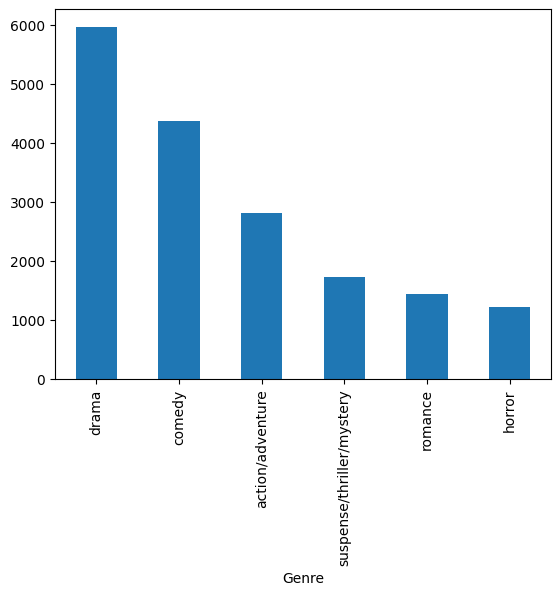

In [62]:
# View the distribution of these six categories.
filtered_df['Genre'].value_counts().plot(kind = 'bar')

In [60]:
# Export the new dataset to a csv
filtered_df.to_csv('final_movies.csv', index=False)